<div style="display: flex; align-items: center;">
    <a href="https://colab.research.google.com/github/jvictorferreira3301/Inteligencia_Computacional/blob/main/src/P2_BaseCredit.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colkkab" style="height: 25px; margin-right: 10px;"/>
    </a>
</div>

Se estiver utilizando o colab: descomente e rode a célula abaixo para fazer o upload do dataset.

In [2]:
'''
from google.colab import files

print("Por favor, faça o upload do arquivo do dataset:")
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
'''

'\nfrom google.colab import files\n\nprint("Por favor, faça o upload do arquivo do dataset:")\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))\n'


# Parte 2

Para a parte 2 do projeto escolhemos o dataset `credit_data.csv` (https://www.kaggle.com/datasets/laotse/credit-risk-dataset [adaptado]) que contém colunas que simulam dados de agências de crédito. Os atributos são as colunas `income` `age` `loan` e a classe é a coluna `default`, classificando quem paga os empréstimos com `1` e quem não paga com `0`.

# Análise inicial, Tratamento e Pré-processamento dos dados (Deliverable 3)

Primeiramente, realizamos uma análise primária no dataset escolhido para a parte 2 utilizando a biblioteca `pandas` para reconhecer nossos `atributos` e `classes`. Através da função `describe` evidenciamos as estatísticas e vemos alguns valores inconsistentes que posteriormente são tratados para não afetar negativamente nosso modelo com dados incongruentes. Exemplo: idade negativa

In [3]:
import pandas as pd
import plotly.express  as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

In [4]:
base_credit = pd.read_csv("datasets/credit_data.csv")
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


Nos trecho abaixo, apagamos somente os dados incorretos e preenchemos as lacunas com a média do resto dos dados. Fizemos o mesmo para linhas com dados faltantes.

In [5]:
base_credit3 = base_credit.drop(base_credit[base_credit['age']< 0].index) # outro método é preencher-los manualmente

In [6]:
print('Média com os valores inconsistentes: ',base_credit['age'].mean()) 
print('Média com valores inconsistentes removidos: ',base_credit3['age'].mean()) 

Média com os valores inconsistentes:  40.80755937840458
Média com valores inconsistentes removidos:  40.92770044906149


In [7]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92 # Preenchimento dos valores inconsistentes com a média

In [8]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [9]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [10]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

## Divisão entre Previsores e Classes

In [11]:
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [12]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

## Padronizaçao

Abaixo são realizadas algumas etapas de pré-processamento, essas etapas são comumente usadas para normalizar os dados, garantindo que eles estejam na mesma escala antes de serem usados em algoritmos de aprendizado de máquina. A padronização é uma técnica que transforma os dados de forma que eles tenham média zero e desvio padrão igual a um. Isso pode ser útil para algoritmos que assumem que os dados estão normalmente distribuídos e têm a mesma escala.

In [13]:
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

## Divisão entre treinamento e teste (Deliverable 3)

Neste trecho de código, está sendo realizado o particionamento dos dados em conjuntos de treinamento e teste usando a função `train_test_split`. Sendo 70% do dataset para treino e 30% para teste.

Esse particionamento dos dados é uma etapa importante para garantir que o modelo seja avaliado corretamente e que possa generalizar bem para novos dados.

In [14]:
X_credit_train, X_credit_teste, y_credit_train, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.30, random_state=0)
X_credit_train.shape

(1400, 3)

# Primeiro modelo: Naive Bayes

Antes de treinar os modelo usados vamos verificar quais os melhores hipeparâmetros para os mesmos através da classe `GridSearchCV` da biblioteca `scikitlearn`. O GridSearchCV é uma técnica popular em aprendizado de máquina usada para encontrar os melhores hiperparâmetros para um modelo, funciona através da criação de um "grid" de hiperparâmetros possíveis e testa todas as combinações possíveis desses hiperparâmetros, usando validação cruzada para avaliar o desempenho de cada combinação. 

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Cria uma instância do classificador Naive Bayes com a distribuição Gaussiana (GaussianNB)
naive_credit_data = GaussianNB() 

# Define os hiperparâmetros para testar
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=200)
}

# Cria o objeto GridSearchCV
grid_search = GridSearchCV(estimator=naive_credit_data, param_grid=param_grid, cv=5)

# Treina o modelo com o Grid Search
grid_search.fit(X_credit_train, y_credit_train)

# Obtem os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Imprime os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(best_params)

Melhores hiperparâmetros encontrados:
{'var_smoothing': 8.504489341802669e-05}


In [16]:

naive_credit_data = GaussianNB(var_smoothing=8.504489341802669e-05) # Cria uma instância do classificador Naive Bayes com a distribuição Gaussiana (GaussianNB)
naive_credit_data.fit(X_credit_train, y_credit_train) # Treina o modelo Naive Bayes com os dados de treinamento padronizados e seus rótulos

GaussianNB(var_smoothing=8.504489341802669e-05)

In [17]:
naive_credit_data = GaussianNB(var_smoothing=8.504489341802669e-05) # Cria uma instância do modelo NB com o valor encontrado como melhor para hiperparâmetro var_smoothing.
naive_credit_data.fit(X_credit_train, y_credit_train) # Treina o modelo 
NB_predict = naive_credit_data.predict(X_credit_teste) # Faz previsões usando o modelo Naive Bayes treinado nos dados de teste e armazena na variavel predict


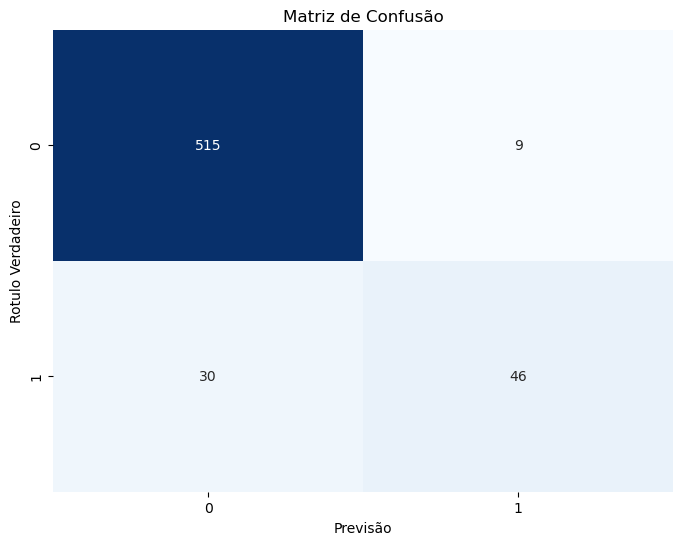

In [18]:
y_true = y_credit_teste  # Rótulos verdadeiros
y_pred = NB_predict  # Previsões do modelo

# Calcula a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plota a matriz de confusão como um mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Rotulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [19]:

print(classification_report(y_credit_teste, NB_predict))
print(accuracy_score(y_credit_teste, NB_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       524
           1       0.84      0.61      0.70        76

    accuracy                           0.94       600
   macro avg       0.89      0.79      0.83       600
weighted avg       0.93      0.94      0.93       600

0.935


# Segundo modelo: Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Cria uma instância do classificador Decision Tree
tree_credit = DecisionTreeClassifier()

# Define os hiperparâmetros para testar
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Cria o objeto GridSearchCV
grid_search = GridSearchCV(estimator=tree_credit, param_grid=param_grid, cv=5)

# Treina o modelo com o Grid Search
grid_search.fit(X_credit_train, y_credit_train)

# Obtem os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Imprime os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(best_params)

Melhores hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [21]:
tree_credit = DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_split=2, min_samples_leaf=1, max_depth=10)
tree_credit.fit(X_credit_train, y_credit_train)
tree_predict = tree_credit.predict(X_credit_teste)


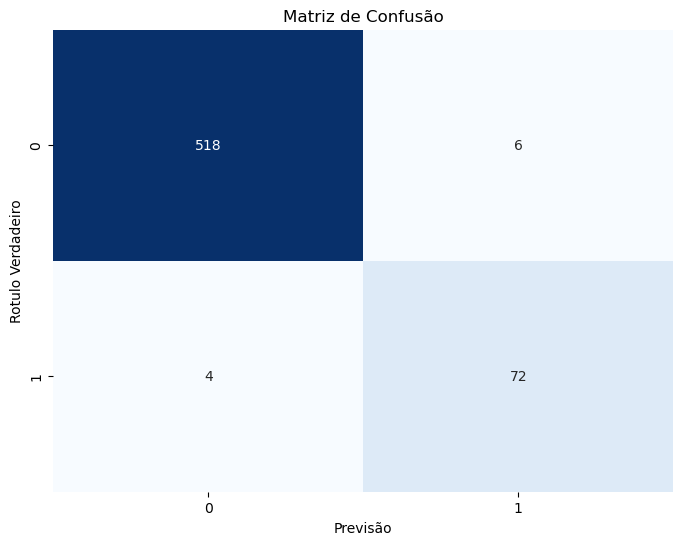

In [22]:
y_true = y_credit_teste # Rótulos verdadeiros
y_pred = tree_predict  # Previsões do modelo

# Calcula a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plota a matriz de confusão como um mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Rotulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

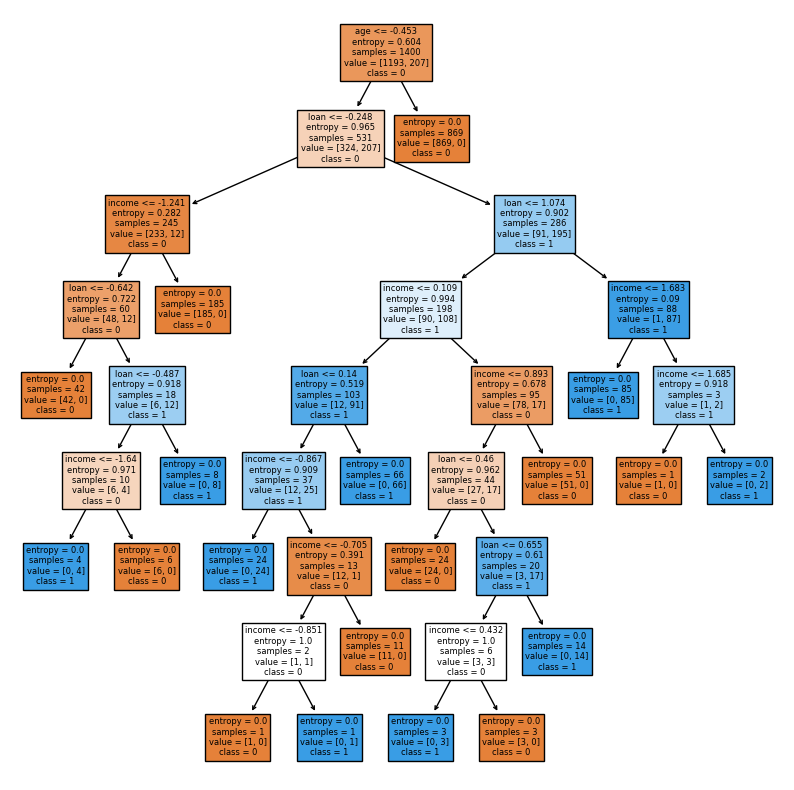

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
tree.plot_tree(tree_credit, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('tree_credit.png')

In [24]:
print(classification_report(y_credit_teste, tree_predict))
print(accuracy_score(y_credit_teste, tree_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       524
           1       0.92      0.95      0.94        76

    accuracy                           0.98       600
   macro avg       0.96      0.97      0.96       600
weighted avg       0.98      0.98      0.98       600

0.9833333333333333


# Terceiro modelo: SVM (Support Vector Machine)

In [25]:
from sklearn import svm

# Cria uma instância do classificador SVM
svm_credit = svm.SVC()

# Define os hiperparâmetros para testar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Cria o objeto GridSearchCV
grid_search = GridSearchCV(estimator=svm_credit, param_grid=param_grid, cv=5)

# Treina o modelo com o Grid Search
grid_search.fit(X_credit_train, y_credit_train)

# Obtem os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Imprime os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(best_params)

Melhores hiperparâmetros encontrados:
{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [26]:

svm_credit = svm.SVC(C=100, gamma='auto', kernel='rbf')
svm_credit.fit(X_credit_train, y_credit_train)
svm_predict = svm_credit.predict(X_credit_teste)

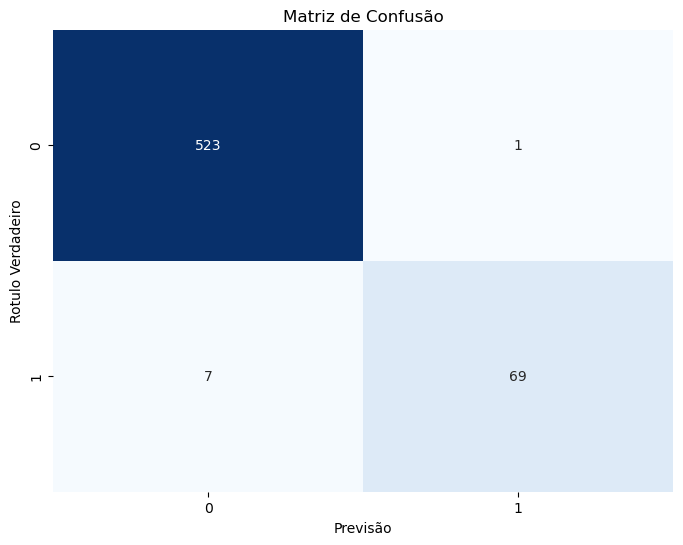

In [27]:
y_true = y_credit_teste # Rótulos verdadeiros
y_pred = svm_predict  # Previsões do modelo

# Calcula a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plota a matriz de confusão como um mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Rotulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [28]:
print(classification_report(y_credit_teste, svm_predict))
print(accuracy_score(y_credit_teste, svm_predict))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       524
           1       0.99      0.91      0.95        76

    accuracy                           0.99       600
   macro avg       0.99      0.95      0.97       600
weighted avg       0.99      0.99      0.99       600

0.9866666666666667


# Conclusão
Obtivemos resultados positivos acima dos 90% de acurácia nos 3 modelos testados, ficando mais ou menos empatado entre os modelos Decision Tree e SVM, então abaixo iremos analisar as estatísticas obtidas nos dois modelos e decidir qual o melhor:

### Acurácia (Accuracy):

- Decision Tree: 98%
- SVM: 99%

O modelo SVM obteve uma acurácia ligeiramente maior em comparação com a árvore de decisão. Isso significa que o SVM classifica corretamente uma maior proporção de exemplos em comparação com a árvore de decisão.

### Precisão (Precision):

- Para a classe 0 (negativa):
Decision Tree: 99%
SVM: 99%
- Para a classe 1 (positiva):
Decision Tree: 92%
SVM: 99%

O SVM obteve uma precisão ligeiramente maior para a classe 1 (positiva), o que significa que o SVM comete menos falsos positivos em comparação com a árvore de decisão.

### Revocação (Recall):

- Para a classe 0 (negativa):
Decision Tree: 99%
SVM: 100%
- Para a classe 1 (positiva):
Decision Tree: 95%
SVM: 91%

A árvore de decisão obteve uma revocação ligeiramente maior para a classe 1 (positiva), o que significa que a árvore de decisão identifica corretamente uma maior proporção de exemplos positivos em comparação com o SVM.

### F1-Score:

- Para a classe 0 (negativa):
Decision Tree: 99%
SVM: 99%
- Para a classe 1 (positiva):
Decision Tree: 94%
SVM: 95%

O SVM obteve um F1-score ligeiramente maior para a classe 1 (positiva), o que representa um equilíbrio entre precisão e revocação.


Em resumo, o SVM parece ter um desempenho ligeiramente melhor em termos de acurácia geral, enquanto a árvore de decisão obteve um desempenho melhor em termos de revocação para a classe positiva. A escolha entre esses modelos dependerá das necessidades específicas do problema e das métricas de avaliação prioritárias.



# Sample Complexity (Deliverable 4)

Nas células abaixo, nós estamos criando uma curva de complexidade de amostra para o modelo SVM criado anteriormente e tido como melhor. A curva de complexidade de amostra nos ajuda a entender como o tamanho do conjunto de treinamento afeta o desempenho do modelo.

In [31]:
def train_predictSVM(X_credit_train, y_credit_train):
    svm_credit = svm.SVC(C=100, gamma='auto', kernel='rbf')
    svm_credit.fit(X_credit_train, y_credit_train)
    svm_predict = svm_credit.predict(X_credit_teste)
    acc = accuracy_score(y_credit_teste, svm_predict)
    return acc

num_samples = list(range(100, 1400, 100))  # Cria uma lista começando em 50, terminando em 2000, aumentando de 50 em 50

accs = []

for i in range(len(num_samples)):
    print(f'\nTraining with {num_samples[i]} samples...')
    accs.append(train_predictSVM(X_credit_train[:num_samples[i]], y_credit_train[:num_samples[i]]))
    print(f' Accuracy is {accs[i]}')


Training with 100 samples...
 Accuracy is 0.9433333333333334

Training with 200 samples...
 Accuracy is 0.9666666666666667

Training with 300 samples...
 Accuracy is 0.9716666666666667

Training with 400 samples...
 Accuracy is 0.975

Training with 500 samples...
 Accuracy is 0.98

Training with 600 samples...
 Accuracy is 0.9866666666666667

Training with 700 samples...
 Accuracy is 0.9866666666666667

Training with 800 samples...
 Accuracy is 0.9816666666666667

Training with 900 samples...
 Accuracy is 0.985

Training with 1000 samples...
 Accuracy is 0.9883333333333333

Training with 1100 samples...
 Accuracy is 0.9883333333333333

Training with 1200 samples...
 Accuracy is 0.9883333333333333

Training with 1300 samples...
 Accuracy is 0.9866666666666667


Text(0, 0.5, 'Test Accuracy')

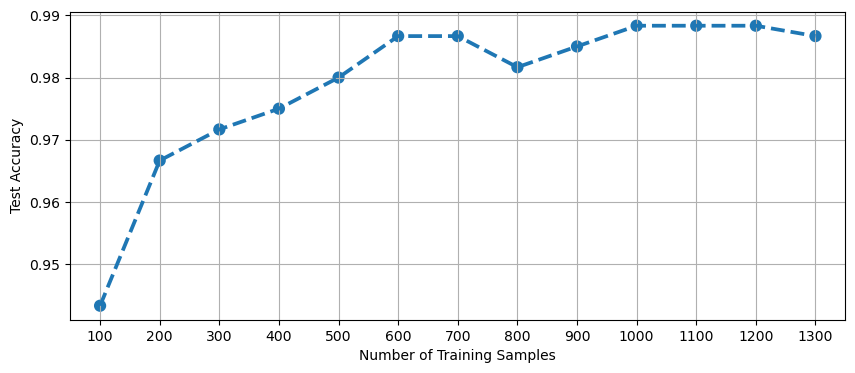

In [32]:
plt.figure(figsize=(10, 4))
sn.pointplot(x=num_samples, y=accs, linestyles='--')
plt.grid(True)
plt.xlabel('Number of Training Samples')
plt.ylabel('Test Accuracy')
